In [38]:
import pandas as pd
import matplotlib.pyplot as plt

target_file = 'nytaxi2022_1500000.csv'
# Assuming 'df' is your DataFrame and 'numerical_column' is the column you want to plot
df = pd.read_csv(target_file)

In [39]:
# analyse feature: tpep_pickup_datetime
format_string = "%m/%d/%Y %I:%M:%S %p"
df['pickup_dt'] = pd.to_datetime(df['tpep_pickup_datetime'], format=format_string, errors='coerce')
df['pickup_dt_hour'] = df['pickup_dt'].dt.hour
df['Is_Weekend'] = df['pickup_dt'].dt.dayofweek >= 5

df = df[~ df['Is_Weekend']].copy() # filter only weekend

category_counts = df['pickup_dt_hour'].value_counts()

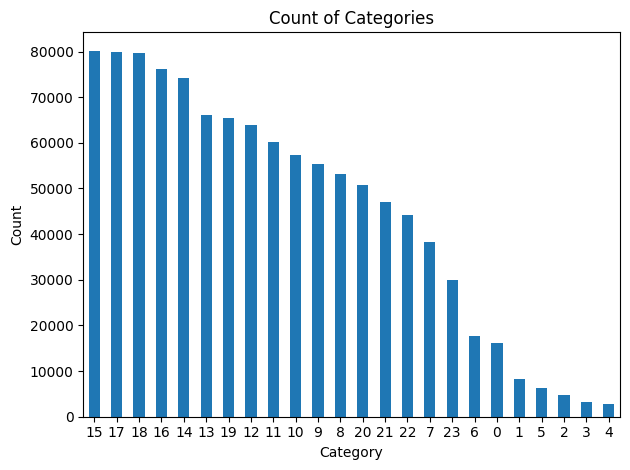

In [40]:
# Print the result
#print(category_counts)

# Plotting as a bar chart
category_counts.plot(kind='bar', title='Count of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0) # Keeps labels horizontal
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

#from plot, decide to divided into 3 groups: high, normal and low demand time
from tpep_pickup_datetime and tpep_dropoff_datetime , will create new column to calculate trip_duration

In [41]:
def bucket_locations(df, col, rare_q=0.8, attract_q=0.97):
    counts = df[col].value_counts(normalize=True)  # frequency
    q_rare = counts.quantile(rare_q)
    q_attract = counts.quantile(attract_q)

    def label_func(x):
        freq = counts.get(x, 0)
        if freq <= q_rare:
            return "rare"
        elif freq >= q_attract:
            return "attractive"
        else:
            return "normal"

    new_col = col + "_bucket"
    df[new_col] = df[col].map(label_func).fillna("rare")
    return df

df = bucket_locations(df, "PULocationID")



PULocationID_bucket
normal        693992
attractive    352504
rare           34453
Name: count, dtype: int64


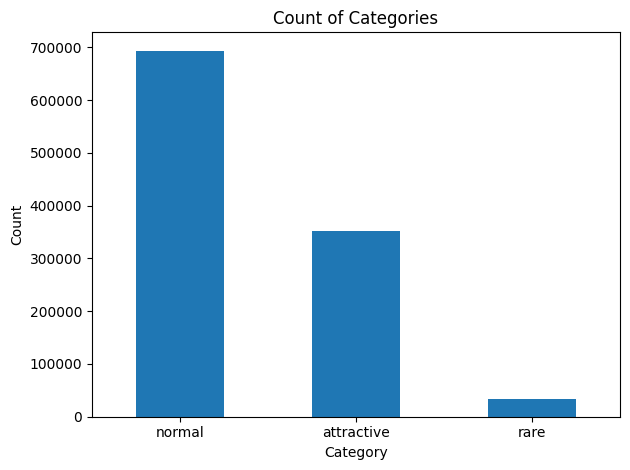

In [42]:
category_counts_location = df['PULocationID_bucket'].value_counts()

# Print the result
print(category_counts_location)

# Plotting as a bar chart
category_counts_location.plot(kind='bar', title='Count of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0) # Keeps labels horizontal
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

passenger_count
1.0    827285
2.0    144207
3.0     34542
0.0     23578
5.0     22778
4.0     14537
6.0     14015
8.0         3
7.0         2
9.0         2
Name: count, dtype: int64


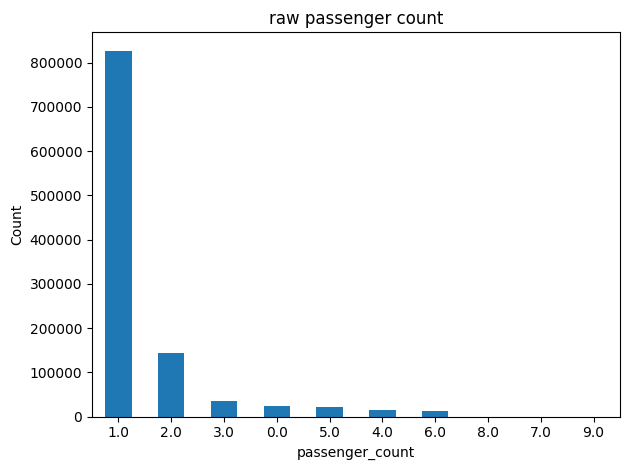

In [43]:
category_passenger_count = df['passenger_count'].value_counts()

# Print the result
print(category_passenger_count)

# Plotting as a bar chart
category_passenger_count.plot(kind='bar', title='raw passenger count')
plt.xlabel('passenger_count')
plt.ylabel('Count')
plt.xticks(rotation=0) # Keeps labels horizontal
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

In [44]:
def bucket_passenger_count(df, col="passenger_count"):
    """
    Bucket passenger_count into 'single', 'normal', 'big_group'.
    """
    def label_func(x):
        if pd.isna(x):
            return "other"   # default bucket
        if x == 1:
            return "single"
        elif 2 == x:
            return "double"
        else:
            return "other"

    new_col = col + "_bucket"
    df[new_col] = df[col].apply(label_func)

    # one-hot encode
    pc_dummies = pd.get_dummies(df[new_col], prefix="passenger")
    df = pd.concat([df, pc_dummies], axis=1)

    # drop original
    # df = df.drop(columns=[col, new_col])
    return df
df = bucket_passenger_count(df)

passenger_count_bucket
single    827285
double    144207
other     109457
Name: count, dtype: int64


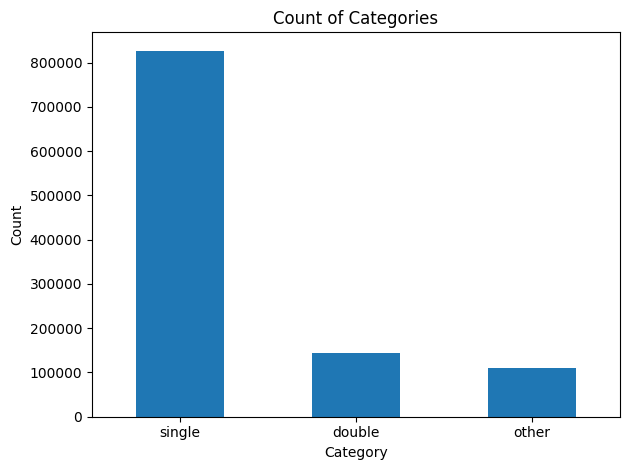

In [45]:
category_passenger_count = df['passenger_count_bucket'].value_counts()

# Print the result
print(category_passenger_count)

# Plotting as a bar chart
category_passenger_count.plot(kind='bar', title='Count of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0) # Keeps labels horizontal
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

RatecodeID
1.0     1037593
2.0       30592
5.0        5381
99.0       4191
3.0        1782
4.0        1401
6.0           9
Name: count, dtype: int64


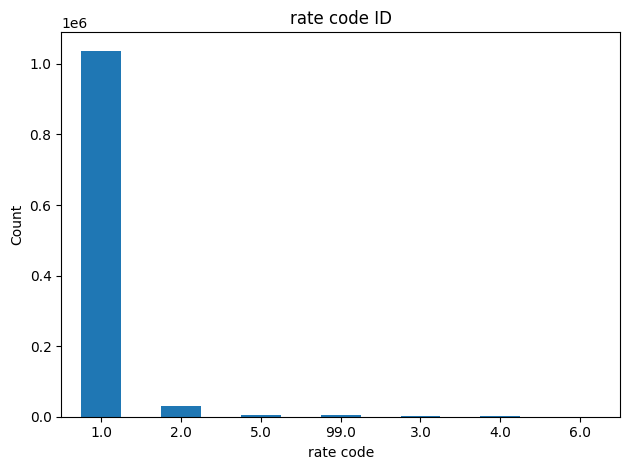

In [46]:
category_passenger_count = df['RatecodeID'].value_counts()

# Print the result
print(category_passenger_count)

# Plotting as a bar chart
category_passenger_count.plot(kind='bar', title='rate code ID')
plt.xlabel('rate code')
plt.ylabel('Count')
plt.xticks(rotation=0) # Keeps labels horizontal
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

In [51]:
def bucket_ratecode(df, col="RatecodeID"):
  def label_func(x):
      if pd.isna(x):
          return "other"   # default bucket
      if x == 1.0:
          return "1"
      else:
          return "other"

  new_col = col + "_bucket"
  df[new_col] = df[col].apply(label_func)
  return df


# def bucket_ratecode(df, col="RatecodeID"):
#     """
#     Collapse RatecodeID into two groups:
#       - 1.0 (standard rate)
#       - other (everything else)
#     """
#     df["RatecodeID_1"] = (df[col] == 1.0).astype(int)
#     df["RatecodeID_other"] = (df[col] != 1.0).astype(int)
    
#     # drop original column
#     # df = df.drop(columns=[col])
#     return df
df = bucket_ratecode(df)

RatecodeID_bucket
1        1037593
other      43356
Name: count, dtype: int64


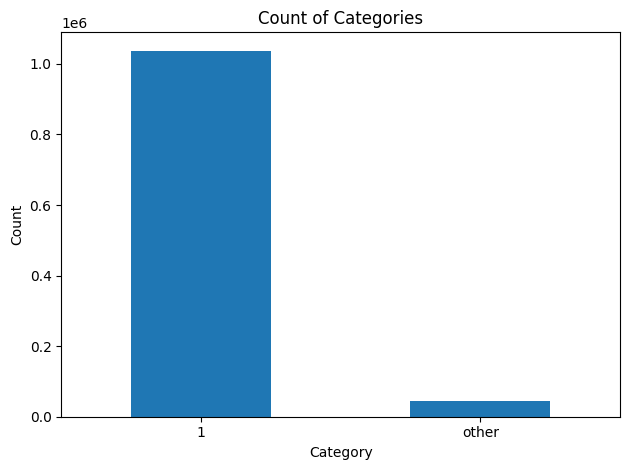

In [53]:
category_ratecode = df['RatecodeID_bucket'].value_counts()

# Print the result
print(category_ratecode)

# Plotting as a bar chart
category_ratecode.plot(kind='bar', title='Count of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0) # Keeps labels horizontal
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

payment_type
1    836751
2    233973
3      5458
4      4767
Name: count, dtype: int64


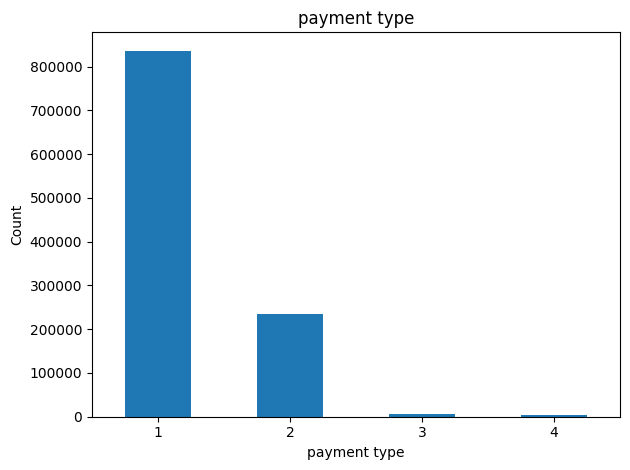

In [54]:
category_passenger_count = df['payment_type'].value_counts()

# Print the result
print(category_passenger_count)

# Plotting as a bar chart
category_passenger_count.plot(kind='bar', title='payment type')
plt.xlabel('payment type')
plt.ylabel('Count')
plt.xticks(rotation=0) # Keeps labels horizontal
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

In [55]:
def bucket_payment_type(df, col="payment_type"):
  def label_func(x):
      if pd.isna(x):
          return "other"   # default bucket
      if x == 1:
          return "1"
      elif x == 2:
          return "2"
      else:
          return "other"

  new_col = col + "_bucket"
  df[new_col] = df[col].apply(label_func)
  return df
df = bucket_payment_type(df)

payment_type_bucket
1        836751
2        233973
other     10225
Name: count, dtype: int64


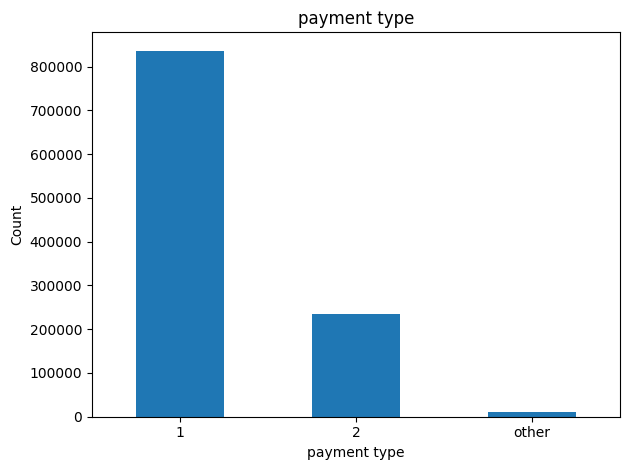

In [56]:
category_payment_type = df['payment_type_bucket'].value_counts()

# Print the result
print(category_payment_type)

# Plotting as a bar chart
category_payment_type.plot(kind='bar', title='payment type')
plt.xlabel('payment type')
plt.ylabel('Count')
plt.xticks(rotation=0) # Keeps labels horizontal
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

#trip distance and trip duration are continuos data, which will be used directly in model